# Библиотеки:

In [ ]:
! pip install razdel

from razdel import tokenize
from statistics import mean

# Wikilingua

**Wikilingua**: https://github.com/esdurmus/Wikilingua?ysclid=li8wpvl48c25196539

**Splitting**: https://drive.google.com/file/d/1PM7GFCy2gJL1WHqQz1dzqIDIEN6kfRoi/view

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Поместите сюда адрес директории с разбиением датасета:

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/WikiLingua_data_splits/'

## Загрузка датасета:

In [ ]:
with open(path + 'train.src.ru', 'r') as f:
    train_txt = f.read().split('\n')

with open(path + 'train.tgt.ru', 'r') as f:
    train_sum = f.read().split('\n')

with open(path + 'val.src.ru', 'r') as f:
    val_txt = f.read().split('\n')

with open(path + 'val.tgt.ru', 'r') as f:
    val_sum = f.read().split('\n')

with open(path + 'test.src.ru', 'r') as f:
    test_txt = f.read().split('\n')

with open(path + 'test.tgt.ru', 'r') as f:
    test_sum = f.read().split('\n')

In [ ]:
train_txt[0]

'. Эндометриоз — это заболевание, при котором клетки эндометрия разрастаются за пределами матки. Клетки могут разрастись вокруг матки и даже распространиться на другие участки брюшной полости. Основными симптомами этого заболевания являются сильные боли во время менструального цикла, которые могут продлиться на протяжении нескольких дней. К другим симптомам также можно отнести следующее:  боль во время секса; боль при испражнении или мочеиспускании, особенно во время менструального цикла; сильное кровотечение во время менструального цикла или в перерыве между циклами; бесплодие; прочие менее серьезные симптомы, вроде вздутия, диареи или запора, тошноты и усталости. Аденомиоз — это заболевание, при котором клетки эндометрия прорастают слишком глубоко в мышечную ткань матки. Это может привести к увеличению размеров матки, болям во время менструаций и прочим симптомам. У некоторых женщин при аденомиозе может не наблюдаться никаких симптомов, у других же может возникнуть следующее:  сильны

In [ ]:
list(tokenize(train_txt[0]))[0:3]

[Substring(0, 1, '.'), Substring(2, 13, 'Эндометриоз'), Substring(14, 15, '—')]

## Статистика: количество текстов в выборке:

In [ ]:
dataset_size = len(train_txt) + len(val_txt) + len(test_txt)
print(f'dataset size: {dataset_size}')

dataset size: 52899


In [ ]:
def non_empy(data):
    n = 0
    for txt in data:
        n += 1 if txt else 0
    return n

In [ ]:
print('train_txt')
print(f'len in texts: {len(train_txt)} p: {len(train_txt)/dataset_size*100} %')
print(f'non empty texts: {non_empy(train_txt)} p: {non_empy(train_txt)/dataset_size*100} %')

train_txt
len in texts: 37029 p: 69.99943288152896 %
non empty texts: 37024 p: 69.98998090701147 %


In [ ]:
print('train_sum')
print(f'len in texts: {len(train_sum)} p: {len(train_sum)/dataset_size*100} %')
print(f'non empty texts: {non_empy(train_sum)} p: {non_empy(train_sum)/dataset_size*100} %')

train_sum
len in texts: 37029 p: 69.99943288152896 %
non empty texts: 37028 p: 69.99754248662545 %


In [ ]:
print('val_txt')
print(f'len in texts: {len(val_txt)} p: {len(val_txt)/dataset_size*100} %')
print(f'non empty texts: {non_empy(val_txt)} p: {non_empy(val_txt)/dataset_size*100} %')

val_txt
len in texts: 5289 p: 9.998298644586855 %
non empty texts: 5286 p: 9.992627459876369 %


In [ ]:
print('val_sum')
print(f'len in texts: {len(val_sum)} p: {len(val_sum)/dataset_size*100} %')
print(f'non empty texts: {non_empy(val_sum)} p: {non_empy(val_sum)/dataset_size*100} %')

val_sum
len in texts: 5289 p: 9.998298644586855 %
non empty texts: 5288 p: 9.996408249683359 %


In [ ]:
print('test_txt')
print(f'len in texts: {len(test_txt)} p: {len(test_txt)/dataset_size*100} %')
print(f'non empty texts: {non_empy(test_txt)} p: {non_empy(test_txt)/dataset_size*100} %')

test_txt
len in texts: 10581 p: 20.002268473884193 %
non empty texts: 10577 p: 19.994706894270216 %


In [ ]:
print('test_sum')
print(f'len in texts: {len(test_sum)} p: {len(test_sum)/dataset_size*100} %')
print(f'non empty texts: {non_empy(test_sum)} p: {non_empy(test_sum)/dataset_size*100} %')

test_sum
len in texts: 10581 p: 20.002268473884193 %
non empty texts: 10580 p: 20.0003780789807 %


## Статистика: количество токенов в тексте (min, max, mean)

In [ ]:
def stat(data):
    lens = [len(list(tokenize(txt))) for txt in data if txt]
    min_ = min(lens)
    max_ = max(lens)
    mean_ = mean(lens)
    return min_, max_, mean_

In [ ]:
min_, max_, mean_ = stat(train_txt)
print('train_txt')
print(f'min: {min_} max: {max_} mean: {mean_}')

train_txt
min: 1 max: 4216 mean: 378.2691497407087


In [ ]:
min_, max_, mean_ = stat(train_sum)
print('train_sum')
print(f'min: {min_} max: {max_} mean: {mean_}')

train_sum
min: 2 max: 917 mean: 38.35929566814303


In [ ]:
min_, max_, mean_ = stat(val_txt)
print('val_txt')
print(f'min: {min_} max: {max_} mean: {mean_}')

val_txt
min: 3 max: 4697 mean: 383.13828982217177


In [ ]:
min_, max_, mean_ = stat(val_sum)
print('val_sum')
print(f'min: {min_} max: {max_} mean: {mean_}')

val_sum
min: 3 max: 517 mean: 39.921898638426626


In [ ]:
min_, max_, mean_ = stat(test_txt)
print('test_txt')
print(f'min: {min_} max: {max_} mean: {mean_}')

test_txt
min: 4 max: 5354 mean: 373.6592606599225


In [ ]:
min_, max_, mean_ = stat(test_sum)
print('test_sum')
print(f'min: {min_} max: {max_} mean: {mean_}')

test_sum
min: 2 max: 464 mean: 39.15463137996219


## Статистика: количество текстов, у которых длина: больше 3 000 токенов / меньше 5 токенов

In [ ]:
def stat_more(data):
    n = 0
    for txt in data:
        n += 1 if len(list(tokenize(txt))) > 3000 else 0
    return n

def stat_less(data):
    n = 0
    for txt in data:
        n += 1 if len(list(tokenize(txt))) < 5 else 0
    return n

In [ ]:
print('train_txt')
print(f'more than 3 000 tokens: {stat_more(train_txt)}')
print(f'less than 5 tokens: {stat_less(train_txt)}')

train_txt
more than 3 000 tokens: 3
less than 5 tokens: 15


In [ ]:
print('train_sum')
print(f'more than 3 000 tokens: {stat_more(train_sum)}')
print(f'less than 5 tokens: {stat_less(train_sum)}')

train_sum
more than 3 000 tokens: 0
less than 5 tokens: 276


In [ ]:
print('val_txt')
print(f'more than 3 000 tokens: {stat_more(val_txt)}')
print(f'less than 5 tokens: {stat_less(val_txt)}')

val_txt
more than 3 000 tokens: 4
less than 5 tokens: 5


In [ ]:
print('val_sum')
print(f'more than 3 000 tokens: {stat_more(val_sum)}')
print(f'less than 5 tokens: {stat_less(val_sum)}')

val_sum
more than 3 000 tokens: 0
less than 5 tokens: 44


In [ ]:
print('test_txt')
print(f'more than 3 000 tokens: {stat_more(test_txt)}')
print(f'less than 5 tokens: {stat_less(test_txt)}')

test_txt
more than 3 000 tokens: 1
less than 5 tokens: 11


In [ ]:
print('test_sum')
print(f'more than 3 000 tokens: {stat_more(test_sum)}')
print(f'less than 5 tokens: {stat_less(test_sum)}')

test_sum
more than 3 000 tokens: 0
less than 5 tokens: 91


In [ ]:
more_ = 1 + 4 + 3
less_ = 11 + 5 + 15
less_s = 91 + 44 + 276

In [ ]:
print('SUMMARY')
print(f'more than 3 000 tokens in texts: {more_} p: {more_ / dataset_size*100} %')
print(f'less than 5 tokens in texts: {less_} p: {less_ / dataset_size*100} %')
print(f'less than 5 tokens in summaries: {less_s} p: {less_s / dataset_size*100} %')

SUMMARY
more than 3 000 tokens in texts: 8 p: 0.015123159227962722 %
less than 5 tokens in texts: 31 p: 0.058602242008355544 %
less than 5 tokens in summaries: 411 p: 0.7769523053365848 %


## Статистика: процент сжатия

In [ ]:
lens_t = []
lens_t_v = []
lens_t_t = []
lens_r = []
lens_r_v = []
lens_r_t = []
for i in range(len(train_txt)):
    if train_txt[i] != '' and train_sum[i] != '':
        lens_t.append(len((list(tokenize(train_txt[i])))))
        lens_r.append(len((list(tokenize(train_sum[i])))))

for i in range(len(val_txt)):
    if val_txt[i] != '' and val_sum[i] != '':
        lens_t_v.append(len((list(tokenize(val_txt[i])))))
        lens_r_v.append(len((list(tokenize(val_sum[i])))))

for i in range(len(test_txt)):
    if test_txt[i] != '' and test_sum[i] != '':
        lens_t_t.append(len((list(tokenize(test_txt[i])))))
        lens_r_t.append(len((list(tokenize(test_sum[i])))))

Train:

In [ ]:
compes = [lens_r[i]/lens_t[i] for i in range(len(lens_r))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.4037685060565276 % max: 14200.0 % mean: 20.716325927591996 %


Val:

In [ ]:
compes = [lens_r_v[i]/lens_t_v[i] for i in range(len(lens_r_v))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.17167381974248927 % max: 1533.3333333333335 % mean: 23.31666630663047 %


Test:

In [ ]:
compes = [lens_r_t[i]/lens_t_t[i] for i in range(len(lens_r_t))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.28016436309301457 % max: 2250.0 % mean: 23.84447460098909 %


## График

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for_hist = [lens_t, lens_t_v, lens_t_t]

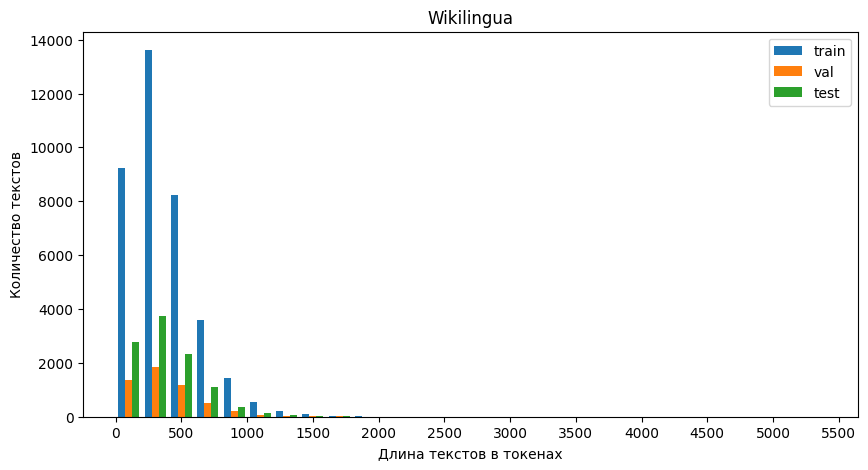

In [ ]:
plt.figure(figsize=(10,5), dpi= 100)
plt.hist(for_hist, bins = range(0, 5401, 200), histtype='bar')#
plt.xticks(range(0, 5501, 500))
plt.legend(['train', 'val', 'test'])
plt.title('Wikilingua')
plt.xlabel("Длина текстов в токенах")
plt.ylabel("Количество текстов")
plt.show()

# Gazeta

## Загрузка датасета:

In [ ]:
try:
    import datasets
except ModuleNotFoundError:
    !pip install datasets
from datasets import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00


In [ ]:
dataset_train = load_dataset('IlyaGusev/gazeta', revision="v2.0")["train"]
dataset_val = load_dataset('IlyaGusev/gazeta', revision="v2.0")["validation"]
dataset_test = load_dataset('IlyaGusev/gazeta', revision="v2.0")["test"]

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for IlyaGusev/gazeta contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/IlyaGusev/gazeta
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/60964 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6793 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6369 [00:00<?, ? examples/s]

## Train

In [ ]:
lens_t = []
lens_r = []
for inst in dataset_train:
    txt, ref = inst['text'], inst['summary']
    lens_t.append(len(list(tokenize(txt))))
    lens_r.append(len(list(tokenize(ref))))

In [ ]:
print(f'length: {len(dataset_train)}')

length: 60964


In [ ]:
print('txt')
print(f'min: {min(lens_t)} max: {max(lens_t)} mean: {mean(lens_t)}')

txt
min: 28 max: 1500 mean: 766.876861754478


In [ ]:
print('ref')
print(f'min: {min(lens_r)} max: {max(lens_r)} mean: {mean(lens_r)}')

ref
min: 15 max: 85 mean: 49.57076307328916


In [ ]:
compes = [lens_r[i]/lens_t[i] for i in range(len(dataset_train))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 1.1135857461024499 % max: 178.57142857142858 % mean: 6.832973220956992 %


## Val

In [ ]:
lens_t_v = []
lens_r_v = []
for inst in dataset_val:
    txt, ref = inst['text'], inst['summary']
    lens_t_v.append(len(list(tokenize(txt))))
    lens_r_v.append(len(list(tokenize(ref))))

In [ ]:
print(f'length: {len(dataset_val)}')

length: 6369


In [ ]:
print('txt')
print(f'min: {min(lens_t_v)} max: {max(lens_t_v)} mean: {mean(lens_t_v)}')

txt
min: 344 max: 1500 mean: 723.9495996231748


In [ ]:
print('ref')
print(f'min: {min(lens_r_v)} max: {max(lens_r_v)} mean: {mean(lens_r_v)}')

ref
min: 15 max: 85 mean: 53.092950227665256


In [ ]:
compes = [lens_r_v[i]/lens_t_v[i] for i in range(len(dataset_val))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 1.1519078473722102 % max: 19.597989949748744 % mean: 7.721841909612348 %


## Test

In [ ]:
lens_t_t = []
lens_r_t = []
for inst in dataset_test:
    txt, ref = inst['text'], inst['summary']
    lens_t_t.append(len(list(tokenize(txt))))
    lens_r_t.append(len(list(tokenize(ref))))

In [ ]:
print(f'length: {len(dataset_test)}')

length: 6793


In [ ]:
print('txt')
print(f'min: {min(lens_t_t)} max: {max(lens_t_t)} mean: {mean(lens_t_t)}')

txt
min: 246 max: 1500 mean: 732.042249374356


In [ ]:
print('ref')
print(f'min: {min(lens_r_t)} max: {max(lens_r_t)} mean: {mean(lens_r_t)}')

ref
min: 15 max: 85 mean: 53.91020167819814


In [ ]:
compes = [lens_r_t[i]/lens_t_t[i] for i in range(len(dataset_test))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 1.1997177134791814 % max: 23.684210526315788 % mean: 7.82995162250998 %


## График

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for_hist = [lens_t, lens_t_v, lens_t_t]

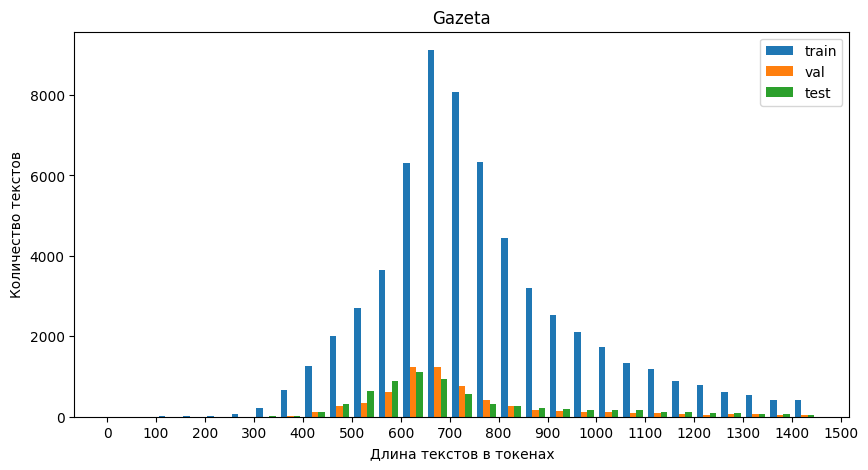

In [ ]:
plt.figure(figsize=(10,5), dpi= 100)
plt.hist(for_hist, bins = range(0, 1500, 50), histtype='bar')
plt.xticks(range(0, 1600, 100))
plt.legend(['train', 'val', 'test'])
plt.title('Gazeta')
plt.xlabel("Длина текстов в токенах")
plt.ylabel("Количество текстов")
plt.show()

# MLSUM

## Загрузка датасета:

In [ ]:
try:
    import datasets
except ModuleNotFoundError:
    !pip install datasets
from datasets import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.7 MB/s eta 0:00:00


In [ ]:
dataset_train = load_dataset('mlsum', 'ru')["train"]
dataset_val = load_dataset('mlsum', 'ru')["validation"]
dataset_test = load_dataset('mlsum', 'ru')["test"]

## Train

In [ ]:
lens_t = []
lens_r = []
for inst in dataset_train:
    txt, ref = inst['text'], inst['summary']
    lens_t.append(len(list(tokenize(txt))))
    lens_r.append(len(list(tokenize(ref))))

In [ ]:
print(f'length: {len(dataset_train)}')

length: 25556


In [ ]:
print('txt')
print(f'min: {min(lens_t)} max: {max(lens_t)} mean: {mean(lens_t)}')

txt
min: 55 max: 11689 mean: 949.8638284551573


In [ ]:
print('ref')
print(f'min: {min(lens_r)} max: {max(lens_r)} mean: {mean(lens_r)}')

ref
min: 10 max: 65 mean: 14.664579746439193


In [ ]:
compes = [lens_r[i]/lens_t[i] for i in range(len(dataset_train))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.0941055693386945 % max: 50.0 % mean: 2.9653748610212594 %


## Val

In [ ]:
lens_t_v = []
lens_r_v = []
for inst in dataset_val:
    txt, ref = inst['text'], inst['summary']
    lens_t_v.append(len(list(tokenize(txt))))
    lens_r_v.append(len(list(tokenize(ref))))

In [ ]:
print(f'length: {len(dataset_val)}')

length: 750


In [ ]:
print('txt')
print(f'min: {min(lens_t_v)} max: {max(lens_t_v)} mean: {mean(lens_t_v)}')

txt
min: 118 max: 5842 mean: 1156.6693333333333


In [ ]:
print('ref')
print(f'min: {min(lens_r_v)} max: {max(lens_r_v)} mean: {mean(lens_r_v)}')

ref
min: 10 max: 30 mean: 13.428


In [ ]:
compes = [lens_r_v[i]/lens_t_v[i] for i in range(len(dataset_val))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.22252653200958575 % max: 11.11111111111111 % mean: 1.8241975521368845 %


## Test

In [ ]:
lens_t_t = []
lens_r_t = []
for inst in dataset_test:
    txt, ref = inst['text'], inst['summary']
    lens_t_t.append(len(list(tokenize(txt))))
    lens_r_t.append(len(list(tokenize(ref))))

In [ ]:
print(f'length: {len(dataset_test)}')

length: 757


In [ ]:
print('txt')
print(f'min: {min(lens_t_t)} max: {max(lens_t_t)} mean: {mean(lens_t_t)}')

txt
min: 69 max: 26794 mean: 1214.3989431968296


In [ ]:
print('ref')
print(f'min: {min(lens_r_t)} max: {max(lens_r_t)} mean: {mean(lens_r_t)}')

ref
min: 10 max: 35 mean: 13.43989431968296


In [ ]:
compes = [lens_r_t[i]/lens_t_t[i] for i in range(len(dataset_test))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.06717921922818541 % max: 27.536231884057973 % mean: 1.8774302348157572 %


## График

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for_hist = [lens_t, lens_t_v, lens_t_t]

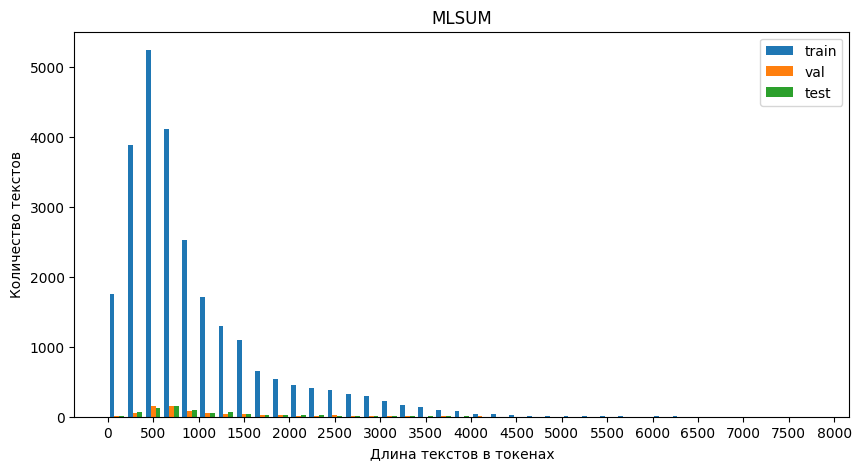

In [ ]:
plt.figure(figsize=(10,5), dpi= 100)
plt.hist(for_hist, bins = range(0, 8000, 200), histtype='bar')
plt.xticks(range(0, 8001, 500))
plt.legend(['train', 'val', 'test'])
plt.title('MLSUM')
plt.xlabel("Длина текстов в токенах")
plt.ylabel("Количество текстов")
plt.show()

# XL-Sum

## Загрузка датасета:

In [ ]:
try:
    import datasets
except ModuleNotFoundError:
    !pip install datasets
from datasets import load_dataset

In [ ]:
dataset_train = load_dataset('csebuetnlp/xlsum', 'russian')["train"]
dataset_val = load_dataset('csebuetnlp/xlsum', 'russian')["validation"]
dataset_test = load_dataset('csebuetnlp/xlsum', 'russian')["test"]

Generating train split:   0%|          | 0/62243 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7780 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/7780 [00:00<?, ? examples/s]

## Train

In [ ]:
lens_t = []
lens_r = []
for inst in dataset_train:
    txt, ref = inst['text'], inst['summary']
    lens_t.append(len(list(tokenize(txt))))
    lens_r.append(len(list(tokenize(ref))))

In [ ]:
print(f'length: {len(dataset_train)}')

length: 62243


In [ ]:
print('txt')
print(f'min: {min(lens_t)} max: {max(lens_t)} mean: {mean(lens_t)}')

txt
min: 19 max: 22274 mean: 682.1371881175393


In [ ]:
print('ref')
print(f'min: {min(lens_r)} max: {max(lens_r)} mean: {mean(lens_r)}')

ref
min: 1 max: 246 mean: 29.40202111080764


In [ ]:
compes = [lens_r[i]/lens_t[i] for i in range(len(dataset_train))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.005946010227137591 % max: 75.0 % mean: 9.597952897570828 %


## Val

In [ ]:
lens_t_v = []
lens_r_v = []
for inst in dataset_val:
    txt, ref = inst['text'], inst['summary']
    lens_t_v.append(len(list(tokenize(txt))))
    lens_r_v.append(len(list(tokenize(ref))))

In [ ]:
print(f'length: {len(dataset_val)}')

length: 7780


In [ ]:
print('txt')
print(f'min: {min(lens_t_v)} max: {max(lens_t_v)} mean: {mean(lens_t_v)}')

txt
min: 62 max: 1583 mean: 556.868380462725


In [ ]:
print('ref')
print(f'min: {min(lens_r_v)} max: {max(lens_r_v)} mean: {mean(lens_r_v)}')

ref
min: 8 max: 60 mean: 27.94370179948586


In [ ]:
compes = [lens_r_v[i]/lens_t_v[i] for i in range(len(dataset_val))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.6637168141592921 % max: 22.58064516129032 % mean: 6.920558659992817 %


## Test

In [ ]:
lens_t_t = []
lens_r_t = []
for inst in dataset_test:
    txt, ref = inst['text'], inst['summary']
    lens_t_t.append(len(list(tokenize(txt))))
    lens_r_t.append(len(list(tokenize(ref))))

In [ ]:
print(f'length: {len(dataset_test)}')

length: 7780


In [ ]:
print('txt')
print(f'min: {min(lens_t_t)} max: {max(lens_t_t)} mean: {mean(lens_t_t)}')

txt
min: 54 max: 1745 mean: 555.8413881748072


In [ ]:
print('ref')
print(f'min: {min(lens_r_t)} max: {max(lens_r_t)} mean: {mean(lens_r_t)}')

ref
min: 8 max: 60 mean: 27.930719794344473


In [ ]:
compes = [lens_r_t[i]/lens_t_t[i] for i in range(len(dataset_test))]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.7772020725388601 % max: 27.77777777777778 % mean: 6.921063041698222 %


## График

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for_hist = [lens_t, lens_t_v, lens_t_t]

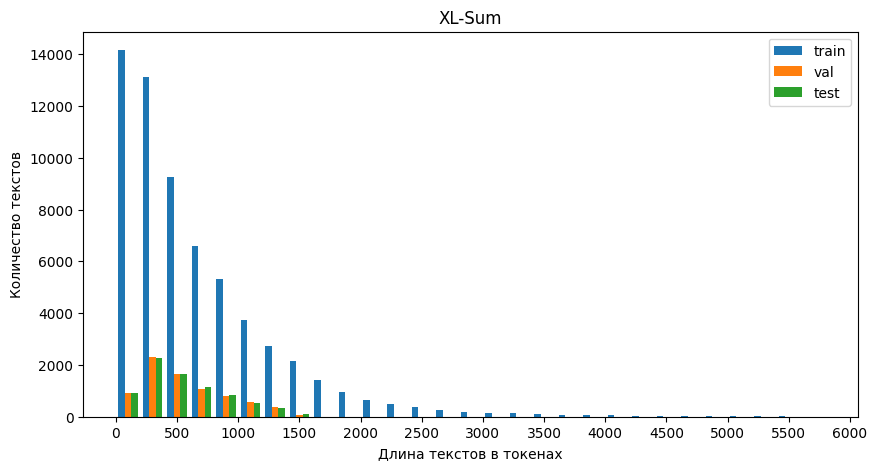

In [ ]:
plt.figure(figsize=(10,5), dpi= 100)
plt.hist(for_hist, bins = range(0, 6000, 200), histtype='bar')
plt.xticks(range(0, 6001, 500))
plt.legend(['train', 'val', 'test'])
plt.title('XL-Sum')
plt.xlabel("Длина текстов в токенах")
plt.ylabel("Количество текстов")
plt.show()

# RuSciText

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset'

In [ ]:
lens_t = []
lens_r = []
for i in range(100):
    with open(path + f'/{i}.txt', 'r') as f:
        inst = f.read()
    txts = inst.split('\n\n')
    #print(i)
    txt, ref = txts[1], txts[2]
    lens_t.append(len(list(tokenize(txt))))
    lens_r.append(len(list(tokenize(ref))))

In [ ]:
print('txt')
print(f'min: {min(lens_t)} max: {max(lens_t)} mean: {mean(lens_t)}')

txt
min: 781 max: 3263 mean: 1928.8


In [ ]:
print('ref')
print(f'min: {min(lens_r)} max: {max(lens_r)} mean: {mean(lens_r)}')

ref
min: 47 max: 358 mean: 126.54


In [ ]:
compes = [lens_r[i]/lens_t[i] for i in range(100)]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 1.8059490084985836 % max: 20.237422272470322 % mean: 7.000551122119895 %


## График

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for_hist = [lens_t]

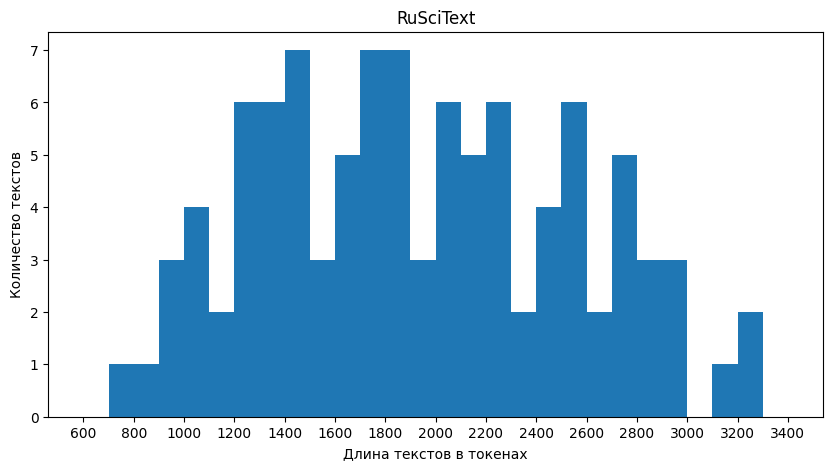

In [ ]:
plt.figure(figsize=(10,5), dpi= 100)
plt.hist(for_hist, bins = range(600, 3401, 100), histtype='bar')
plt.xticks(range(600, 3401, 200))
plt.title('RuSciText')
plt.xlabel("Длина текстов в токенах")
plt.ylabel("Количество текстов")
plt.show()

# RuArxiv

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/arxiv'

In [ ]:
lens_t = []
lens_r = []
for i in range(400):
    with open(path + f'/{i}.txt', 'r') as f:
        inst = f.read()
    txts = inst.split('\n\n')
    txt, ref = txts[0], txts[1]
    lens_t.append(len(list(tokenize(txt))))
    lens_r.append(len(list(tokenize(ref))))

In [ ]:
print('txt')
print(f'min: {min(lens_t)} max: {max(lens_t)} mean: {mean(lens_t)}')

txt
min: 448 max: 54050 mean: 6174.1025


In [ ]:
print('ref')
print(f'min: {min(lens_r)} max: {max(lens_r)} mean: {mean(lens_r)}')

ref
min: 17 max: 2291 mean: 187.7125


In [ ]:
compes = [lens_r[i]/lens_t[i] for i in range(400)]

In [ ]:
print('compression')
print(f'min: {min(compes) * 100} % max: {max(compes) * 100} % mean: {mean(compes) * 100} %')

compression
min: 0.22327658386826682 % max: 74.8108108108108 % mean: 4.844816165360285 %


## График

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for_hist = [lens_t]

Количество текстов длиной больше 13 000 токенов:

In [ ]:
len([l for l in lens_t if l > 13000])

27

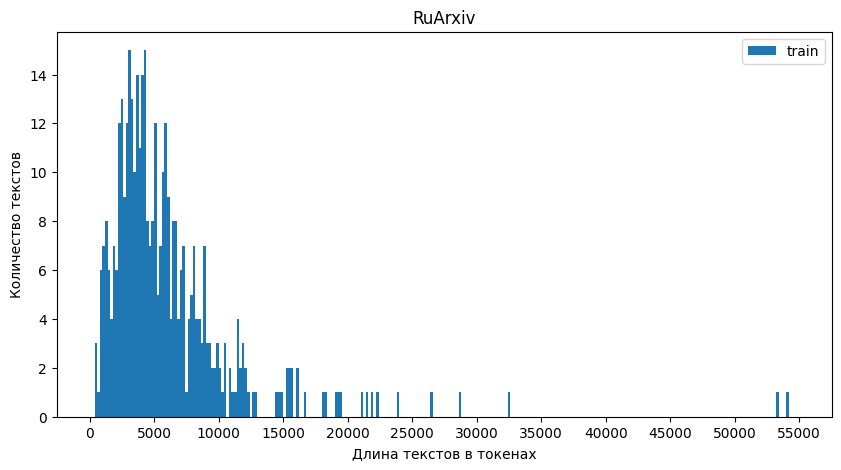

In [ ]:
plt.figure(figsize=(10,5), dpi= 100)
plt.hist(for_hist, bins = range(200, 55000, 200), histtype='bar')
plt.xticks(range(0, 55001, 5000))
plt.legend(['train', 'val', 'test'])
plt.title('RuArxiv')
plt.xlabel("Длина текстов в токенах")
plt.ylabel("Количество текстов")
plt.show()

# Графики эталонных рефератов

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
try:
    import datasets
except ModuleNotFoundError:
    !pip install datasets
from datasets import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Gazeta:

In [ ]:
dataset_train = load_dataset('IlyaGusev/gazeta', revision="v2.0")["train"]
lens_r_g = []
for inst in dataset_train:
    ref = inst['summary']
    lens_r_g.append(len(list(tokenize(ref))))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for IlyaGusev/gazeta contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/IlyaGusev/gazeta
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnin

Generating train split:   0%|          | 0/60964 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6793 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6369 [00:00<?, ? examples/s]

MLSUM:

In [ ]:
dataset_train = load_dataset('mlsum', 'ru')["train"]
lens_r_m = []
for inst in dataset_train:
    ref = inst['summary']
    lens_r_m.append(len(list(tokenize(ref))))

Generating train split:   0%|          | 0/25556 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/750 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/757 [00:00<?, ? examples/s]

XL-Sum:

In [ ]:
dataset_train = load_dataset('csebuetnlp/xlsum', 'russian')["train"]
lens_r_x = []
for inst in dataset_train:
    ref = inst['summary']
    lens_r_x.append(len(list(tokenize(ref))))

Generating train split:   0%|          | 0/62243 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7780 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/7780 [00:00<?, ? examples/s]

Wikilingua:

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/WikiLingua_data_splits/'

with open(path + 'train.src.ru', 'r') as f:
    train_txt = f.read().split('\n')

with open(path + 'train.tgt.ru', 'r') as f:
    train_sum = f.read().split('\n')

lens_r_w = []
for i in range(len(train_txt)):
    if train_txt[i] != '' and train_sum[i] != '':
        lens_r_w.append(len((list(tokenize(train_sum[i])))))

RuSciText:

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset'
lens_r_d = []
for i in range(100):
    with open(path + f'/{i}.txt', 'r') as f:
        inst = f.read()
    txts = inst.split('\n\n')
    ref = txts[2]
    lens_r_d.append(len(list(tokenize(ref))))

RuArxiv:

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/arxiv'
lens_r_a = []
for i in range(400):
    with open(path + f'/{i}.txt', 'r') as f:
        inst = f.read()
    txts = inst.split('\n\n')
    ref = txts[1]
    lens_r_a.append(len(list(tokenize(ref))))

In [ ]:
for_hist_r = [lens_r_g, lens_r_m, lens_r_x, lens_r_w, lens_r_a, lens_r_d]

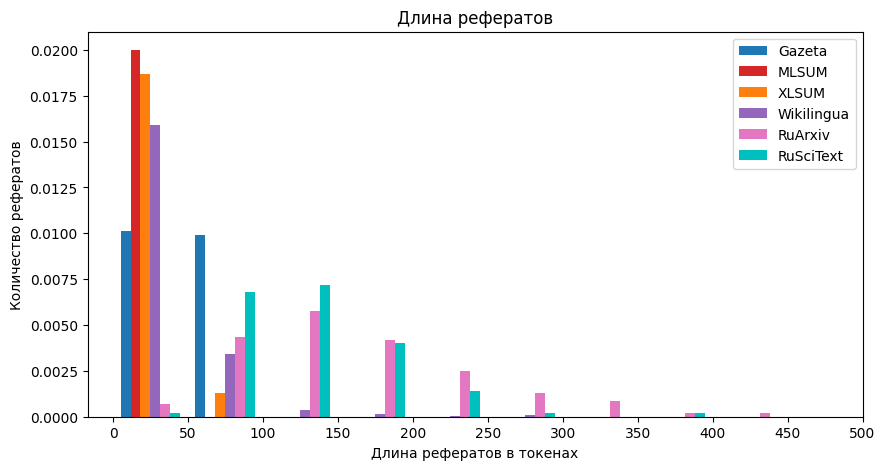

In [53]:
plt.figure(figsize=(10,5), dpi= 100)
plt.hist(for_hist_r, bins = range(0, 500, 50), histtype='bar', density=True,
         color = ['C0', 'C3', 'C1', 'C4', 'C6', 'c'])
plt.xticks(range(0, 501, 50))
plt.legend(['Gazeta', 'MLSUM', 'XLSUM', 'Wikilingua', 'RuArxiv', 'RuSciText'])
plt.title('Длина рефератов')
plt.xlabel("Длина рефератов в токенах")
plt.ylabel("Количество рефератов")
plt.show()